In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

## Parametos del portafolio

In [7]:
stocks = ["AVGO","COST","FSLR","UHS"]
weights = np.array([0.25,0.25,0.25,0.25])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()


## Descarga de precios

In [8]:
prices = yf.download(stocks,start='2023-01-01',end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
AVGO    0.002788
COST    0.001162
FSLR    0.001179
UHS     0.000829
dtype: float64
\nMatriz de covarianza:
Ticker      AVGO      COST      FSLR       UHS
Ticker                                        
AVGO    0.000885  0.000096  0.000241  0.000072
COST    0.000096  0.000159  0.000052  0.000057
FSLR    0.000241  0.000052  0.001269  0.000089
UHS     0.000072  0.000057  0.000089  0.000342


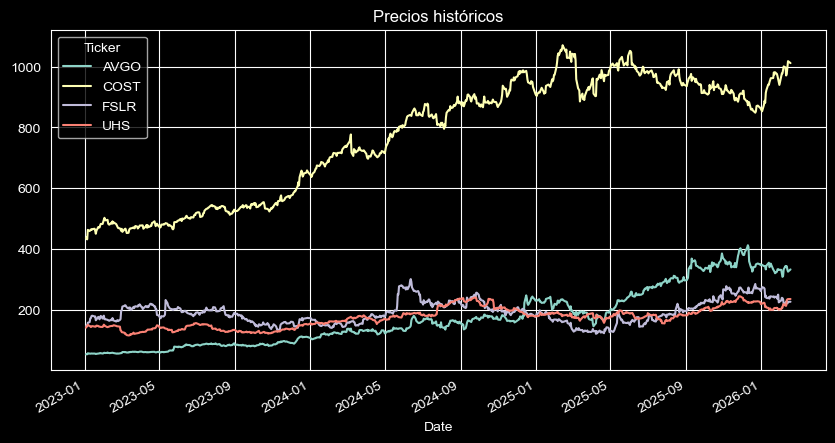

In [9]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

## Correlación de activos

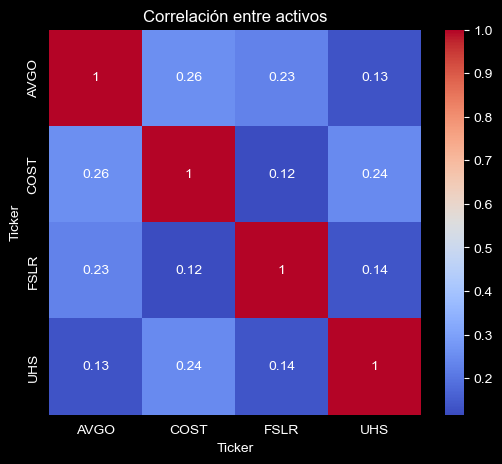

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

Podemos ver que hay muy poca correlación entre los activos ya que el portafolio esta muy diversificado y no hay acciones del mismo sector dentro del portafolio, por lo cual la correlación es baja



## Retornos historicos

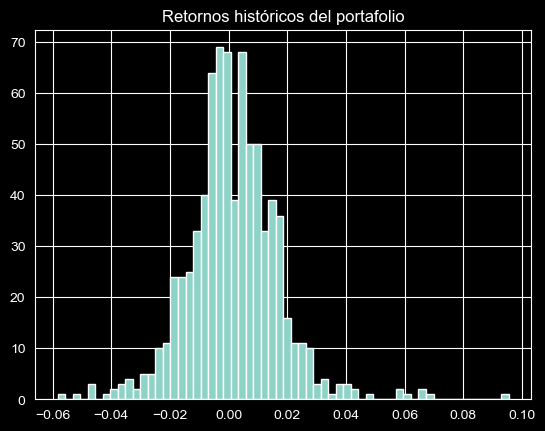

In [12]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()


In [14]:
print("Volatilidad histórica diaria:", portfolio_hist.std())

Volatilidad histórica diaria: 0.015552077500778734


Podemos ver que la volatilidad del portafolio no esta muy elevada y se encuentra en un rango bueno se podria decir

La distribución de los rendimientos es casi normal

---

# Simulación MonteCarlo

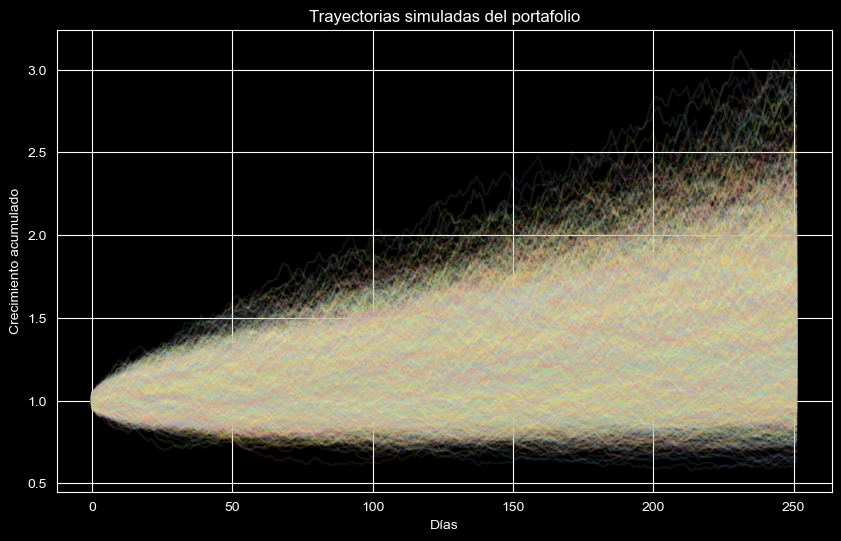

In [17]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

    plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

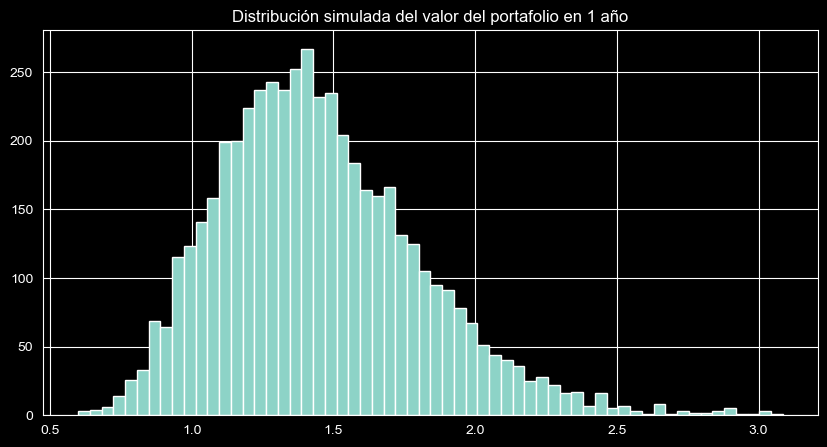

In [19]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()


In [20]:

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

Valor esperado final: 1.4510452114368426
Probabilidad de pérdida: 0.0832


---
## Portafolio nuevo


In [21]:
stocks = ["AVGO","COST","FSLR","UHS"]
weights = np.array([0.15,0.55,0.15,0.15])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
prices = yf.download(stocks,start='2023-01-01',end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
AVGO    0.002788
COST    0.001162
FSLR    0.001179
UHS     0.000829
dtype: float64
\nMatriz de covarianza:
Ticker      AVGO      COST      FSLR       UHS
Ticker                                        
AVGO    0.000885  0.000096  0.000241  0.000072
COST    0.000096  0.000159  0.000052  0.000057
FSLR    0.000241  0.000052  0.001269  0.000089
UHS     0.000072  0.000057  0.000089  0.000342


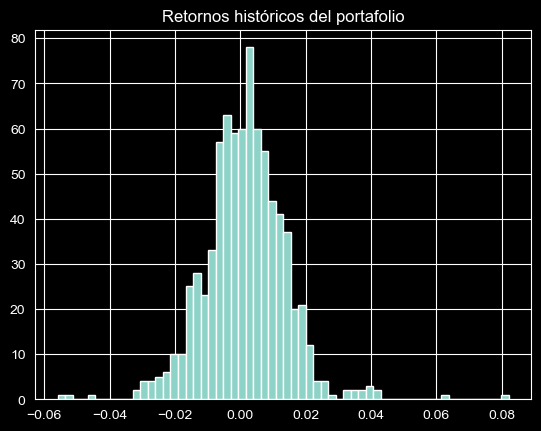

In [24]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()


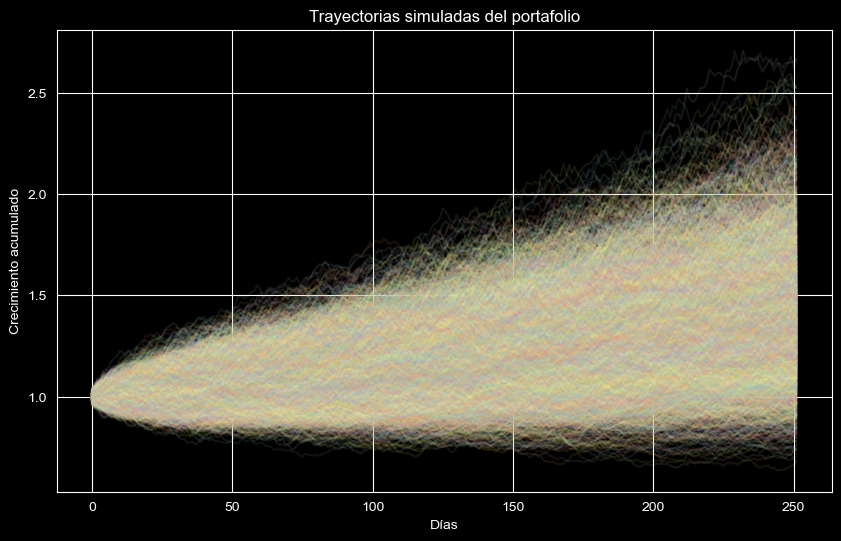

In [25]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

    plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

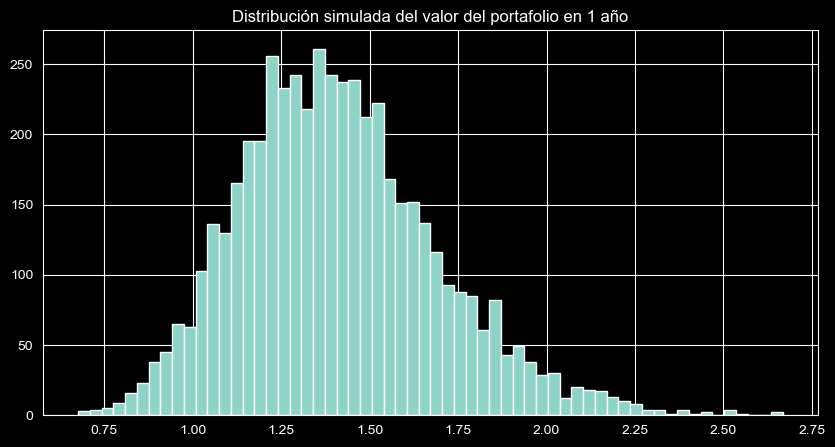

In [26]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()


In [27]:

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

Valor esperado final: 1.4106542857914461
Probabilidad de pérdida: 0.0506


# Conclusiones
* Podemos ver que los activos tienen una baja correlación debido a que todos pertenecen a sectores diferentes
* El portafolio parece un poco variable ya que la distribución esta un poco cargada a la izquierda lo que nos dice que tiene valores extremos a la alza
* Costco es el activo que domina el portafolio por lo cual decidi darle mas peso en el nuevo portafolio para ver que pasaba
* También podemos ver que el portafolio viejo y el nuevo son muy parecidos y hay muy pocos cambios, se ven casi iguales
* La distribución final del portafolio sigue cargada a la izquierda lo que nos dice que hay algunos movimientos a la alza que afectan al portafolio